### Name : Tazmeen Afroz
### Roll No :22P-9252
### BAI-7A

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


#### Lab Task 1 – Robert Cross
______________________________________

The Roberts Cross operator is one of the earliest edge detectors and uses two 2×2
convolution kernels to approximate the gradient diagonally. In this task, you will use
the convolution function from LAB2 that performs 2D convolution on an image
without using any built-in convolution functions. Then, apply the Roberts Cross
operator by convolving the grayscale image with the given kernels. Compare the
result with built in Roberts Cross. Display the resulting edge maps.

In [2]:
def convolution2d(image, kernel,):
    image_h, image_w = image.shape
    kernel_h, kernel_w = kernel.shape
   

    padding_h = (kernel_h - 1) // 2
    padding_w = (kernel_w - 1) // 2

    padded_image = np.pad(image, ((padding_h, padding_h), (padding_w, padding_w)), mode='constant', constant_values=0)
    output = np.zeros((image_h, image_w))

    print(output.size)
    
    for i in range(image_h):
        for j in range(image_w):
            new = padded_image[i:i+kernel_h, j:j+kernel_w]
            output[i, j] = np.sum(new * kernel)
    return output

image = np.random.rand(8, 4)
print(image)
kernel = np.random.rand(3, 3)
kernel = np.flipud(np.fliplr(kernel))

convolution2d(image,kernel)


[[0.68499872 0.49258246 0.46253247 0.73959019]
 [0.36399207 0.98246213 0.34038885 0.68329858]
 [0.85760237 0.41546594 0.2081574  0.36885273]
 [0.40400648 0.55755594 0.74983045 0.75520503]
 [0.75440406 0.08971121 0.06932255 0.0656758 ]
 [0.30223222 0.05775471 0.84080269 0.93888435]
 [0.17948182 0.44520486 0.74241812 0.80866907]
 [0.53306654 0.40741252 0.52155702 0.87658071]]
32


array([[1.40843056, 1.58864428, 1.80808318, 0.92744089],
       [1.68347312, 2.01778475, 2.48376723, 1.19551876],
       [1.59738626, 2.26562354, 2.1519071 , 0.90490658],
       [1.18828439, 2.00310784, 1.95910908, 1.31470307],
       [0.85448621, 1.88783986, 1.54932036, 0.86521712],
       [0.7500339 , 1.90447083, 1.96428306, 1.47182489],
       [0.86470309, 1.82339386, 2.62714997, 1.94819462],
       [0.81756143, 1.56224948, 2.04429316, 1.57120874]])

155694
155694


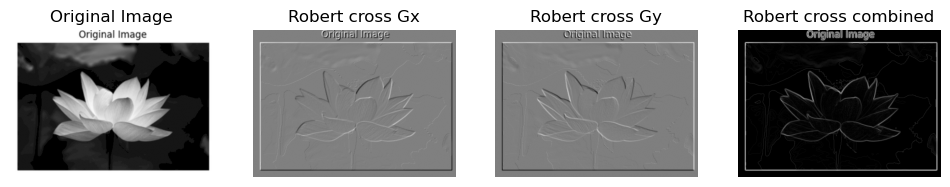

In [3]:
#Robert cross kernel

g_x = np.array([[1,0],
                [0,-1]])
g_y = np.array([[0,1],
                [-1,0]])


task1_img = cv2.imread('phool.png',cv2.IMREAD_GRAYSCALE)
output = convolution2d(task1_img,g_x)
output1 = convolution2d(task1_img,g_y)
combined = np.sqrt(output**2 + output1**2)



plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(task1_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')         
plt.subplot(1,4,2)
plt.imshow(output,cmap='gray')
plt.title('Robert cross Gx')        
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(output1,cmap='gray')     
plt.title('Robert cross Gy')
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(combined,cmap='gray')     
plt.title('Robert cross combined')  
plt.axis('off')
plt.show()




#### Lab Task 2 –Prewitt
______________________________________________

The Prewitt operator is a gradient-based method similar to Sobel but with simpler
kernels. It uses 3×3 masks to estimate edges in both horizontal and vertical
directions. In this task, create the Prewitt filters and apply them to your images
using your implemented convolution function. Compare the results with built in
Prewitt function.

155694
155694


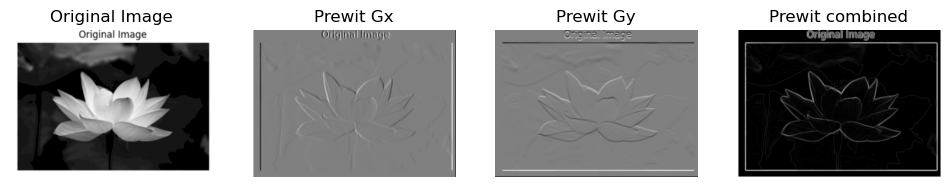

In [4]:
prewit_x = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]])

prewit_y = np.array([[-1, -1, -1],
                     [ 0,  0,  0],
                     [ 1,  1,  1]])

output3= convolution2d(task1_img,prewit_x)
output4= convolution2d(task1_img,prewit_y)
combined1 = np.sqrt(output3**2 + output4**2)

plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(task1_img,cmap='gray')
plt.title('Original Image')     
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(output3,cmap='gray')
plt.title('Prewit Gx')  
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(output4,cmap='gray')
plt.title('Prewit Gy')  
plt.axis('off')


plt.subplot(1,4,4)
plt.imshow(combined1,cmap='gray')
plt.title('Prewit combined')
plt.axis('off')
plt.show()


#### Lab Task 3 – Sobel
________________________________________________

The Sobel operator improves upon the Prewitt method by giving more weight to the
central pixels of the 3×3 kernel, making it more robust to noise. In this task, you will
apply the Sobel operator in both horizontal and vertical directions to detect edges.

155694
155694


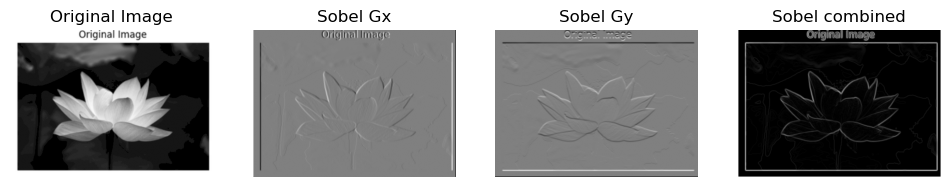

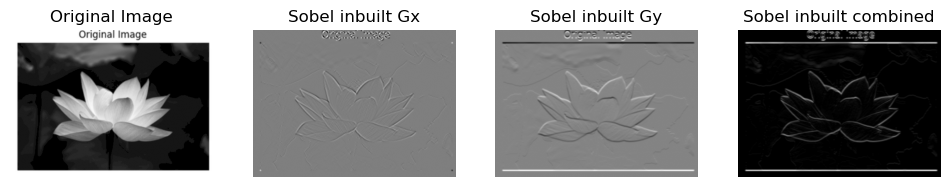

In [5]:
#sobel operator

sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]])

sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]])

output6 = convolution2d(task1_img,sobel_x)
output7= convolution2d(task1_img,sobel_y)
combined2 = np.sqrt(output6**2 + output7**2)

#sobel inbuilt function
sobel_x_in = cv2.Sobel(task1_img,cv2.CV_64F,1,1,ksize=5)
sobel_y_in = cv2.Sobel(task1_img,cv2.CV_64F,0,1,ksize=5)
combined_in = np.sqrt(sobel_x_in**2 + sobel_y_in**2)

plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(task1_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(output6,cmap='gray')
plt.title('Sobel Gx')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(output7,cmap='gray')
plt.title('Sobel Gy')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(combined2,cmap='gray')
plt.title('Sobel combined')
plt.axis('off')
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(1,4,1)
plt.imshow(task1_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow(sobel_x_in,cmap='gray')
plt.title('Sobel inbuilt Gx')
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow(sobel_y_in,cmap='gray')
plt.title('Sobel inbuilt Gy')   
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow(combined_in,cmap='gray')
plt.title('Sobel inbuilt combined')
plt.axis('off')
plt.show()




#### Lab Task 4 – Laplacian 
________________________________________

The Laplacian operator is a second-order derivative method that detects regions of
rapid intensity change. In this task, you will smooth the image with your Gaussian
function from Task 3 and then apply the Laplacian operator to highlight the edges.
Use both common Laplacian kernels (4-neighbor and 8-neighbor) to see the
difference in the resulting edge maps. Provide code, screenshots, and explanations
of the output.

155694
155694


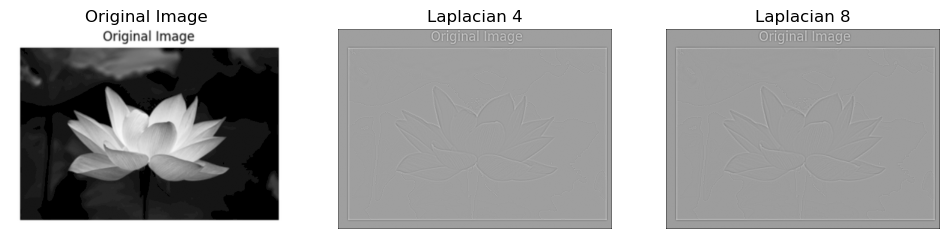

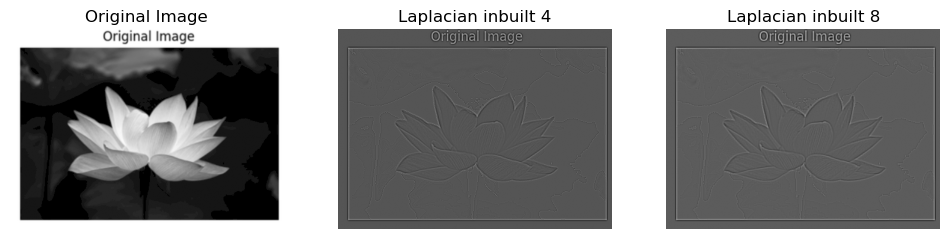

In [6]:
# laplacian operator

laplacian_4= np.array([[0,1,0],
                        [1,-4,1],
                        [0,1,0]])

laplacian_8= np.array([[1,1,1],
                        [1,-8,1],
                        [1,1,1]])

output9 = convolution2d(task1_img,laplacian_4)
output10 = convolution2d(task1_img,laplacian_8)

#inbuilt function
laplacian_4_in = cv2.Laplacian(task1_img,cv2.CV_64F,ksize=1)
laplacian_8_in = cv2.Laplacian(task1_img,cv2.CV_64F,ksize=3)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(task1_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(output9,cmap='gray')
plt.title('Laplacian 4')    
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(output10,cmap='gray')
plt.title('Laplacian 8')
plt.axis('off')
plt.show()

plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(task1_img,cmap='gray')   
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(laplacian_4_in,cmap='gray')
plt.title('Laplacian inbuilt 4')

plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(laplacian_8_in,cmap='gray')
plt.title('Laplacian inbuilt 8')
plt.axis('off')
plt.show()